In [1]:
%%bash
cat 3001.json

{"1":{"name":"Guido van Rossum","password":"unladenswallow","details":{"profession":"ex-BDFL"}},"2":{"name":"Brendan Eich","password":"nontransitiveequality","details":{"profession":"Mozillan"}},"3":{"name":"Ken Thompson","password":"p/q2-q4!","details":{"profession":"Unix Creator"}}}

#https://stedolan.github.io/jq/

In [2]:
%%bash
jq . 3001.json

{
  "1": {
    "name": "Guido van Rossum",
    "password": "unladenswallow",
    "details": {
      "profession": "ex-BDFL"
    }
  },
  "2": {
    "name": "Brendan Eich",
    "password": "nontransitiveequality",
    "details": {
      "profession": "Mozillan"
    }
  },
  "3": {
    "name": "Ken Thompson",
    "password": "p/q2-q4!",
    "details": {
      "profession": "Unix Creator"
    }
  }
}


In [ ]:
%%bash
js="
const fs = require('fs');
let raw = fs.readFileSync('3001.json');
let users = JSON

Won't use the code above much, too heavy.
Code below will be used more often

In [3]:
import json
with open('3001.json') as fh:
    users = json.load(fh)
users

{'1': {'name': 'Guido van Rossum',
  'password': 'unladenswallow',
  'details': {'profession': 'ex-BDFL'}},
 '2': {'name': 'Brendan Eich',
  'password': 'nontransitiveequality',
  'details': {'profession': 'Mozillan'}},
 '3': {'name': 'Ken Thompson',
  'password': 'p/q2-q4!',
  'details': {'profession': 'Unix Creator'}}}

GeoJSON

In [4]:
import json
with open('gz_2010_us_050_00_20m.json', encoding='ISO-8859-1') as fh:
    counties = json.load(fh)
    
counties.keys()

dict_keys(['type', 'features'])

Code below shows how many counties (3221) and what type(list) of features

In [5]:
counties['type'], type(counties['features']), len(counties['features'])

('FeatureCollection', list, 3221)

In [7]:
counties['features'][999]

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US19153',
  'STATE': '19',
  'COUNTY': '153',
  'NAME': 'Polk',
  'LSAD': 'County',
  'CENSUSAREA': 573.795},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-93.328614, 41.507824],
    [-93.328486, 41.49134],
    [-93.328407, 41.490921],
    [-93.41226, 41.505549],
    [-93.790612, 41.511916],
    [-93.814282, 41.600448],
    [-93.815527, 41.863419],
    [-93.698032, 41.86337],
    [-93.347933, 41.863104],
    [-93.348681, 41.600999],
    [-93.328614, 41.507824]]]}}

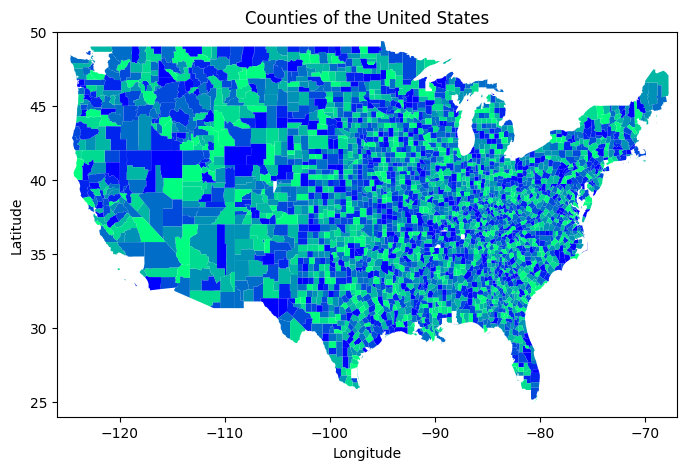

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots(figsize=(8, 5))
patches, colors, ncolor = [], [], 8

for n, county in enumerate(counties['features']):
    # Only use first polygon if multiple discontiguous regions
    poly = np.array(county['geometry']['coordinates'][0])
    poly = poly.reshape(-1, 2)
    polygon = Polygon(poly)
    patches.append(polygon)
    colors.append(n % ncolor)

#https://matplotlib.org/stable/tutorials/colors/colormaps.html
p = PatchCollection(patches, cmap=cm.get_cmap('winter', ncolor))
p.set_array(np.array(colors))
ax.add_collection(p)

ax.set_ylim(24, 50)
ax.set_ylabel("Latitude")
ax.set_xlim(-126, -67)
ax.set_xlabel("Longitude")
ax.set_title("Counties of the United States");
plt.savefig("Counties_of_the_United States.png")
